In [1]:
import pandas as pd
import numpy as np
import random

#데이터 샘플 수
num_samples = 1000

#나이 생성(18~70세)
ages = np.random.randint(18, 71, num_samples)

#성별 생성(Male, Female)
genders = ['Male', 'Female']
gender = [random.choice(genders) for _ in range(num_samples)]

#운전 경력 생성(1~40년)
driving_experience = np.random.randint(1, 41, num_samples)

#사고 이력 생성(0: 없음  1: 있음)
accident_history = np.random.choice([0, 1], size=num_samples, p=[0.8, 0.2])

#차량 종류 생성(Sedan, SUV, Truck 등)
vehicle_types = ['Sedan', 'SUV', 'Truck', 'Coupe', 'Van']
vehicle_type = [random.choice(vehicle_types) for _ in range(num_samples)]

#연간 주생 거리 생성(5,000 ~ 30,000 km)
annual_mileage = np.random.randint(5000, 30001, num_samples)

#차량 연식 생성(1 ~ 15년)
vehicle_age = np.random.randint(1, 16, num_samples)

#위치 생성 (Urban: 도시, Suburban: 교외, Rural: 농촌)
locations = ['Urban', 'Suburban', 'Rural']
location = [random.choice(locations) for _ in range(num_samples)]

#신용 점수 생성 (300 ~ 850)
credit_scores = np.random.randint(300, 851, num_samples)

#차량 가치 생성 (5,000 ~ 50,000 USD)
vehicle_value = np.random.randint(5000, 50001, num_samples)

#보험료 생성 (특성에 따른 보험료 책정)
insurance_premium = []
for i in range(num_samples) :
    base_premium = 500  #기본 보험료
    age_factor = 10*(ages[i] - 20)  #나이에 따른 보험료 증가
    experience_factor = -5 * (driving_experience[i] - 5)  #운전 경력에 따른 보험료 할인
    accident_factor = 500 if accident_history[i] == 1 else 0  #사고 이력에 따른 보험료 증가

    #차량 유형에 따른 추가 요금
    vehicle_type_factor = {'Sedan': 0, 'SUV': 150, 'Truck': 200, 'Coupe': 100, 'Van': 50}
    vehicle_type_premium = vehicle_type_factor[vehicle_type[i]]

    #연간 주행 거리, 차량 연식, 차량 가치 등에 따른 요인
    mileage_factor = 0.05 * (annual_mileage[i] - 10000)
    age_factor_vehicle = 15 * (vehicle_age[i] - 3)
    vehicle_value_factor = 0.01 * vehicle_value[i]

    #총 보험료 계산
    total_premium = base_premium + age_factor + experience_factor + accident_factor + vehicle_type_premium + mileage_factor + age_factor_vehicle + vehicle_value_factor
    total_premium = max(500, total_premium)  #보험료가 최소 500이 되도록 설정
    insurance_premium.append(total_premium)

In [2]:
data = {
    'Age': ages,
    'Gender': gender,
    'Driving_Experience': driving_experience,
    'Accident_History': accident_history,
    'Vehicle_Type': vehicle_type,
    'Annual_Mileage': annual_mileage,
    'Vehicle_Age': vehicle_age,
    'Location': location,
    'Credit_Score': credit_scores,
    'Vehicle_Value': vehicle_value,
    'Insurance': insurance_premium
}

df = pd.DataFrame(data)

df.to_csv('d:/data/insurance/insurance_data.csv', index=False)

print(df.head())

   Age  Gender  Driving_Experience  Accident_History Vehicle_Type  \
0   63  Female                  35                 0        Coupe   
1   39  Female                  30                 1        Coupe   
2   42  Female                  19                 0        Truck   
3   21  Female                  17                 0        Coupe   
4   35  Female                  34                 1        Sedan   

   Annual_Mileage  Vehicle_Age  Location  Credit_Score  Vehicle_Value  \
0           18878            3     Rural           731          10399   
1           29742            6     Urban           316           8227   
2            5153            2  Suburban           320          36912   
3           11738            1     Urban           424          22304   
4           20747            6     Rural           794           5967   

   Insurance  
0    1427.89  
1    2279.37  
2     961.77  
3     829.94  
4    1647.02  


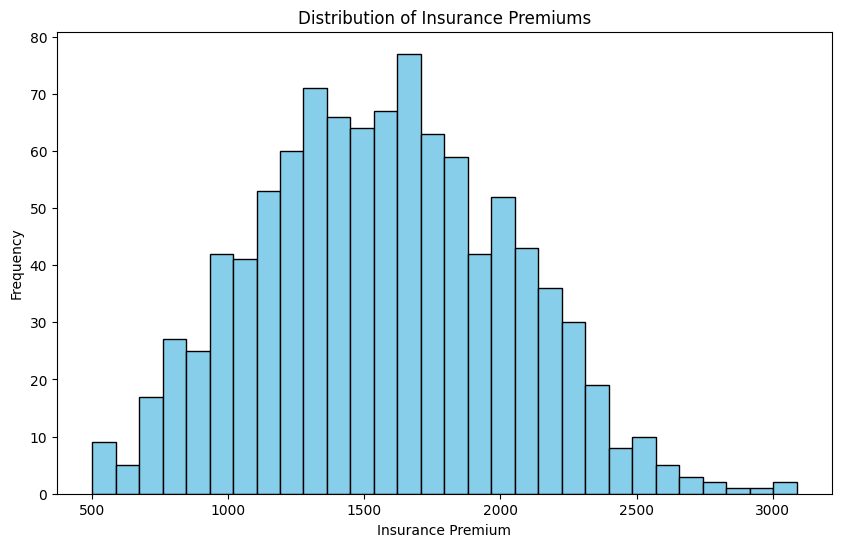

In [3]:
import matplotlib.pyplot as plt

#보험료 분포 시각화
plt.figure(figsize=(10, 6))
plt.hist(df['Insurance'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Insurance Premiums')
plt.xlabel('Insurance Premium')
plt.ylabel('Frequency')
plt.show()

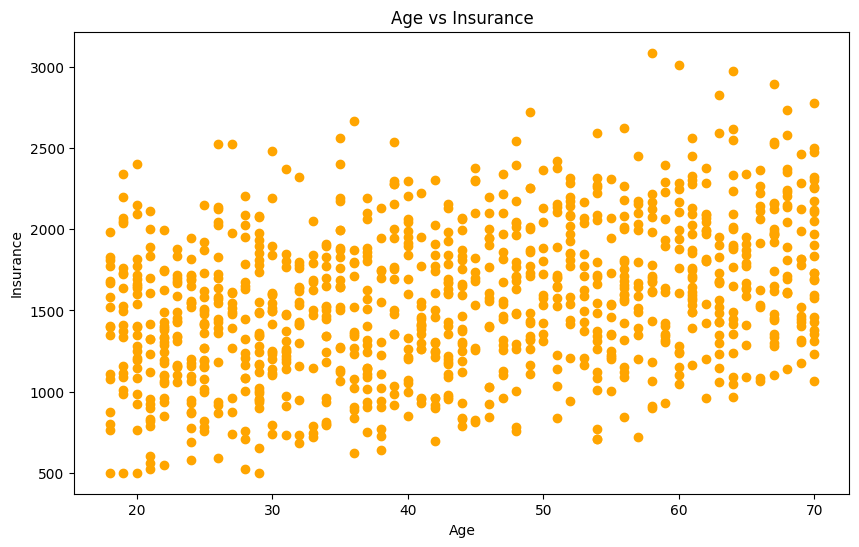

In [4]:
#나이와 보험료 관계 시각화
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Insurance'], color='orange')
plt.title('Age vs Insurance')
plt.xlabel('Age')
plt.ylabel('Insurance')
plt.show()